In [1]:
import os
import cv2 
import itertools
import numpy as np 
import pandas as pd 

test_dir = "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/"
train_dir = "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/"

data = []


In [2]:
for dirtrain in os.listdir(train_dir): 
    print(dirtrain)
    for tr in os.listdir(train_dir + dirtrain):
        img = cv2.imread(train_dir + dirtrain + "/" + tr)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)
        
        data.append([img, dirtrain])     

ModerateDemented
NonDemented
VeryMildDemented
MildDemented


In [3]:
for dirtest in  os.listdir(test_dir):    
    print(dirtest)
    for ts in os.listdir(test_dir + dirtest):
        img = cv2.imread(test_dir + dirtest + "/" + ts)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)
        
        data.append([img, dirtest])

ModerateDemented
NonDemented
VeryMildDemented
MildDemented


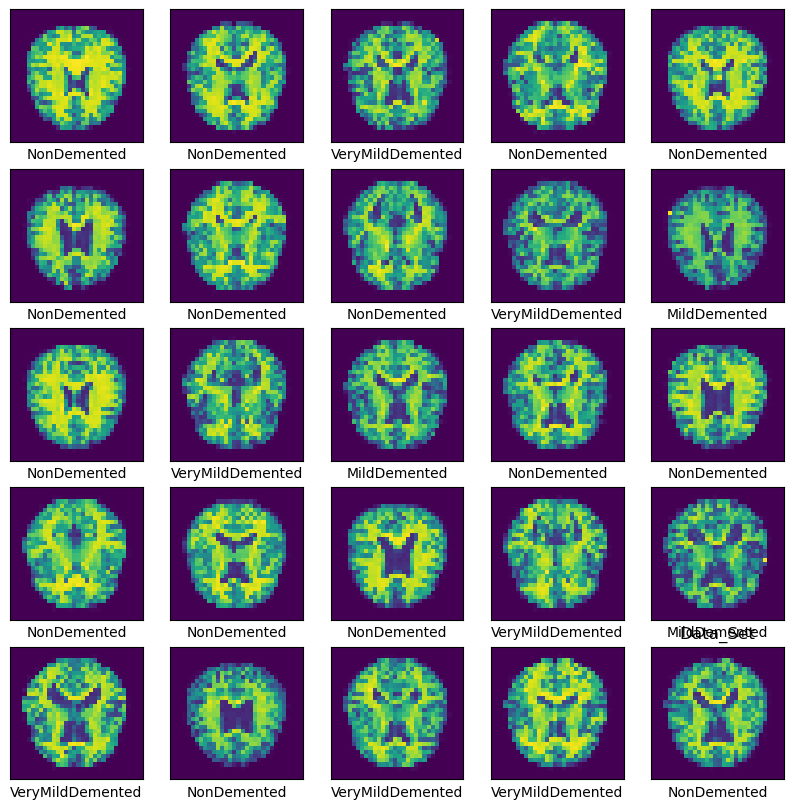

In [54]:
Labels=['MildDemented', 'ModerateDemented', 'NonDemented','VeryMildDemented']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.xlabel(Labels[np.argmax(y_train[i])])
    plt.xticks([])
    plt.yticks([])
plt.title('Data_Set')
plt.savefig('Data_set.png')

In [4]:
import random
random.seed(20)

In [5]:
random.shuffle(data)

In [6]:
x, y = [], []
for e in data:
    x.append(e[0])
    y.append(e[1])

In [7]:
from sklearn.preprocessing import OneHotEncoder

x = np.array(x)
y = np.array(y)
y = y.reshape(y.shape[0],1)
enc = OneHotEncoder(handle_unknown='ignore').fit(y)
print(enc.categories_)
y = enc.transform(y).toarray()
print(f'Data   :   {str(x.shape)}')
print(f'Labels :   {str(y.shape)}')

[array(['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented'], dtype='<U16')]
Data   :   (6400, 32, 32, 1)
Labels :   (6400, 4)


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

In [9]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [29]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = tf.keras.Sequential()
model.add(Conv2D(256,(3,3),input_shape=(32,32,1),activation='relu',padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 256)       2560      
                                                                 
 dropout_22 (Dropout)        (None, 32, 32, 256)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 dropout_23 (Dropout)        (None, 32, 32, 256)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 128)       295040    
                                                                 
 dropout_24 (Dropout)        (None, 32, 32, 128)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 128)      

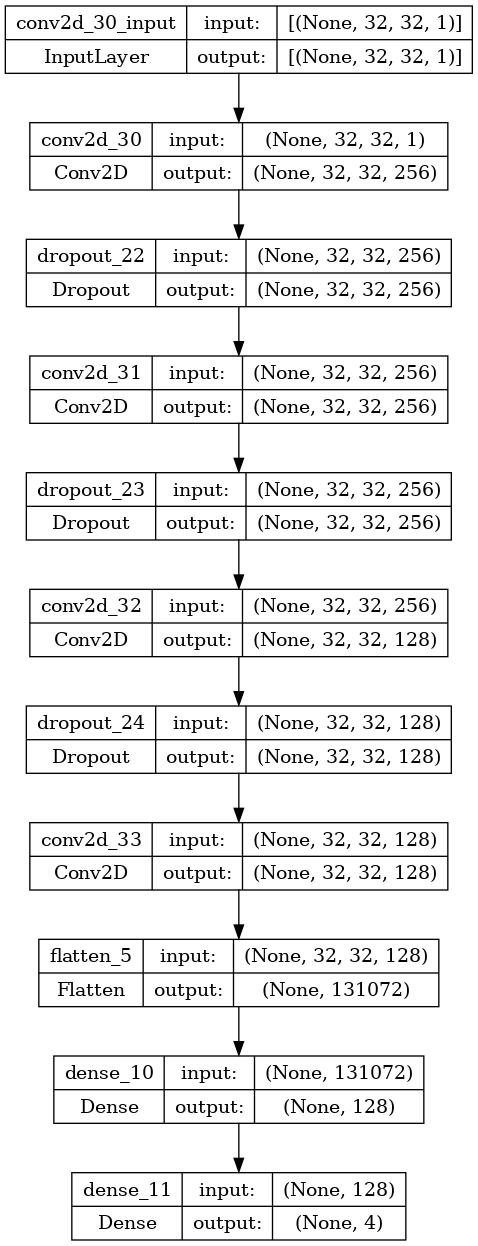

In [31]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [32]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64,verbose=1,shuffle=True)

Epoch 1/200


2023-11-06 17:28:53.440952: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_22/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


64/64 [==============================] - 5s 41ms/step - loss: 19.1034 - accuracy: 0.4402 - val_loss: 1.0835 - val_accuracy: 0.5088
Epoch 2/200
64/64 [==============================] - 2s 38ms/step - loss: 1.0320 - accuracy: 0.4998 - val_loss: 1.0239 - val_accuracy: 0.5244
Epoch 3/200
64/64 [==============================] - 2s 38ms/step - loss: 1.0212 - accuracy: 0.5051 - val_loss: 1.0088 - val_accuracy: 0.5322
Epoch 4/200
64/64 [==============================] - 2s 38ms/step - loss: 1.0191 - accuracy: 0.5051 - val_loss: 0.9889 - val_accuracy: 0.5127
Epoch 5/200
64/64 [==============================] - 2s 38ms/step - loss: 1.0126 - accuracy: 0.5125 - val_loss: 0.9786 - val_accuracy: 0.5234
Epoch 6/200
64/64 [==============================] - 2s 38ms/step - loss: 0.9944 - accuracy: 0.5156 - val_loss: 0.9758 - val_accuracy: 0.5674
Epoch 7/200
64/64 [==============================] - 2s 38ms/step - loss: 0.9811 - accuracy: 0.5361 - val_loss: 0.9803 - val_accuracy: 0.5693
Epoch 8/200
64/64

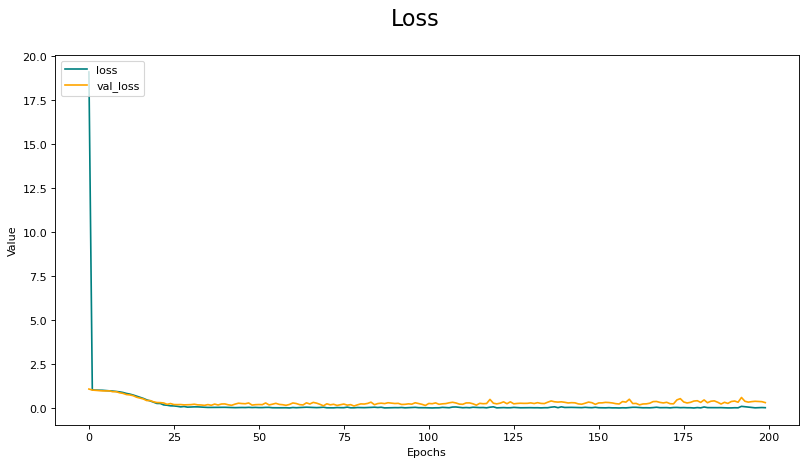

In [47]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(12, 6), dpi=80)
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.savefig("loss.jpg")
plt.show()

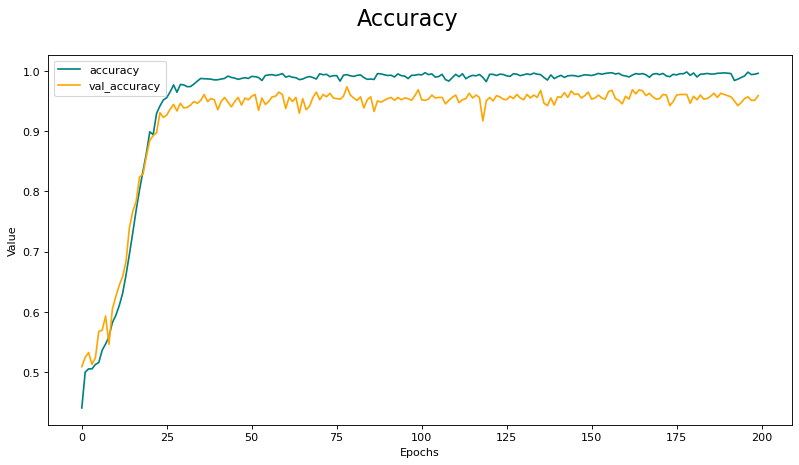

In [48]:
fig = plt.figure(figsize=(12, 6), dpi=80)
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.savefig("Accuracy.jpg")
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report([np.argmax(i) for i in y_test],[np.argmax(i) for i in model.predict(x_test)],target_names=['ModerateDemented','NonDemented','VeryMildDemented','MildDemented']))

40/40 [==============================] - 1s 5ms/step
                  precision    recall  f1-score   support

ModerateDemented       0.94      0.98      0.96       167
     NonDemented       1.00      0.91      0.95        11
VeryMildDemented       0.98      0.97      0.98       632
    MildDemented       0.97      0.97      0.97       470

        accuracy                           0.97      1280
       macro avg       0.97      0.96      0.97      1280
    weighted avg       0.97      0.97      0.97      1280



In [37]:
from sklearn import metrics

df = pd.DataFrame(
  data = metrics.confusion_matrix(np.argmax(y_test, axis=1), [np.argmax(i) for i in model.predict(x_test)]),
  columns = ['ModerateDemented','NonDemented','VeryMildDemented','MildDemented'],
  index = ['ModerateDemented','NonDemented','VeryMildDemented','MildDemented']
)
df

40/40 [==============================] - 0s 6ms/step


,ModerateDemented,NonDemented,VeryMildDemented,MildDemented
ModerateDemented,164,0,1,2
NonDemented,1,10,0,0
VeryMildDemented,6,0,612,14
MildDemented,3,0,9,458


<Axes: >

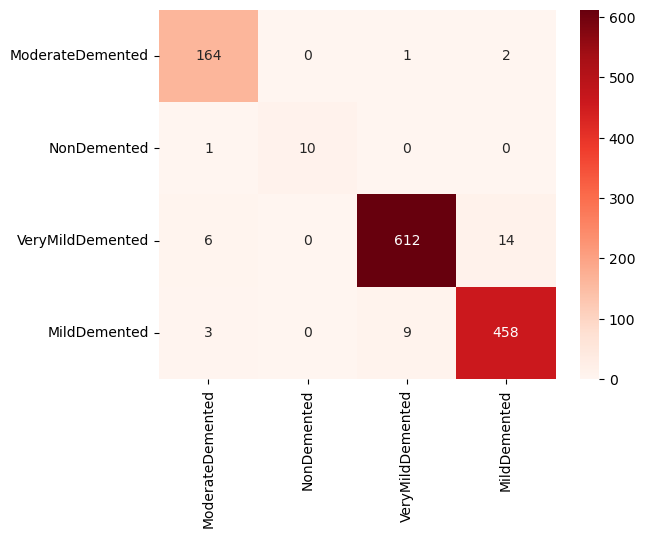

In [38]:
import seaborn as sns

sns.heatmap(df, cmap="Reds", annot=True, fmt='.0f')

In [39]:
model.save("Mini_Project")

In [40]:
import shutil
shutil.make_archive('miniproject', 'zip', '/kaggle/working/Mini_Project')

'/kaggle/working/miniproject.zip'

In [41]:
x_test.shape

(1280, 32, 32, 1)

In [42]:
model.predict(x_test)

40/40 [==============================] - 0s 5ms/step


array([[2.15363514e-25, 0.00000000e+00, 1.00000000e+00, 1.93952574e-18],
       [1.76832280e-20, 2.58032489e-35, 1.52173386e-13, 1.00000000e+00],
       [1.00000000e+00, 7.09344457e-38, 1.76897765e-12, 3.05037524e-08],
       ...,
       [1.06474003e-19, 0.00000000e+00, 1.26363053e-09, 1.00000000e+00],
       [9.99998927e-01, 0.00000000e+00, 1.11171437e-06, 3.28125582e-10],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.47132042e-18]],
      dtype=float32)

In [43]:
import numpy as np

In [44]:
model.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 145ms/step


array([[2.1537175e-25, 0.0000000e+00, 1.0000000e+00, 1.9395257e-18]],
      dtype=float32)

In [45]:
y_test[0]

array([0., 0., 1., 0.])

In [46]:
np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)))

1/1 [==============================] - 0s 19ms/step


2

In [55]:
from tensorflow.keras.models import Model

In [74]:
layer1=Model(inputs=model.input, outputs=model.layers[0].output)
layer2=Model(inputs=model.input, outputs=model.layers[1].output)
layer3=Model(inputs=model.input, outputs=model.layers[2].output)
layer4=Model(inputs=model.input, outputs=model.layers[3].output)
layer5=Model(inputs=model.input, outputs=model.layers[4].output)

In [75]:
ans_1=layer1.predict(x_test)
ans_2=layer2.predict(x_test)
ans_3=layer3.predict(x_test)
ans_4=layer4.predict(x_test)
ans_5=layer5.predict(x_test)

40/40 [==============================] - 0s 4ms/step


(1280, 32, 32, 256)

In [83]:
import os
import shutil
shutil.rmtree('/kaggle/working/Layer1')
os.makedirs('Layer1')

In [84]:
import os
os.makedirs('Layer2')
os.makedirs('Layer3')
os.makedirs('Layer4')
os.makedirs('Layer5')

FileExistsError: [Errno 17] File exists: 'Layer2'

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


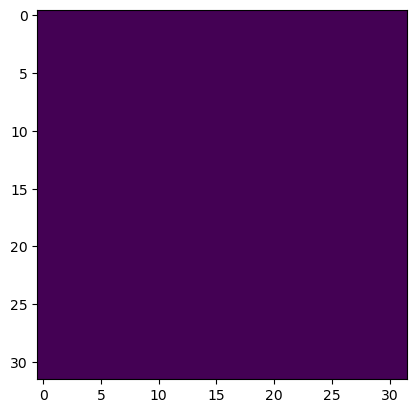

In [85]:
for i in range(10):
    print(ans[1][:,:,i].shape)
    plt.imshow(ans[1][:,:,i])
    plt.savefig(f'Layer1/Convolution_{i}_Output')

In [86]:
shutil.make_archive('Layer1', 'zip', '/kaggle/working/Mini_Project')

'/kaggle/working/Layer1.zip'

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


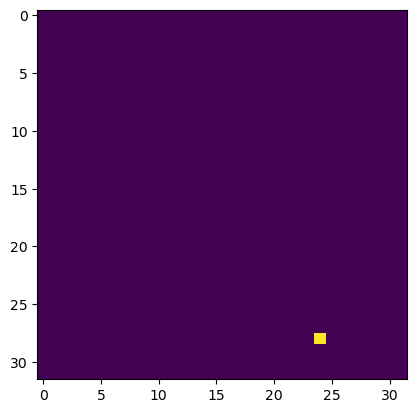

In [88]:
for j in range(2,6):
    for i in range(10):
        print(ans[j][:,:,i].shape)
        plt.imshow(ans[j][:,:,i])
        plt.savefig(f'Layer{j}/Convolution_{i}_Output')
    shutil.make_archive(f'Layer{j}', 'zip', '/kaggle/working/Mini_Project')

In [ ]:
m